## Connecting Naive Bayes and Logistic Regression

### 1. Basics of Probability and Likelihood

Each probability distribution has a probability density function (PDF) for continuous distribution e.g. gaussian distribution (or a probability mass function or PMF for discrete distribution, e.g. binomial distribution) which indicates the probability of a sample (some point) taking a particular value. This function is usually denoted by $P(y|\theta)$ where $y$ is the value of the sample and $\theta$ is the parameter that describes the PDF/PMF. When more than 1 sample is drawn independently of one another then we can write as ---

$P(y_1, y_2, ...., y_n|\theta) = \prod \limits_{i=1}^n P(y_i|\theta)\, ...... (1.1)$

----------------------------------------------
**Likelihood**
----------------------------------------------

We consider the PDF's in calculations when we know the distribution (and corresponding parameter $\theta$) and want to deduce $y_i$'s. Here we think of $\theta$ is fixed (known) for different samples we want to deduce different $y_i$'s. The likelihood function is same but with a twist. Here $y_i$'s are known and $\theta$ is the variable that we want to determine. We can think of this as collecting data samples $(y_i)$ and want to find a distribution (with parameter $\theta$). 

$\underbrace {L(y_1, ...., y_n|\theta)}_\text{$\theta$ unknown, $y_i's$ known} \, \, = \underbrace {P(y_1, ...., y_n|\theta)}_\text{$\theta$ fixed/known, $y_i's$ change/unknown}$

----------------------------------------------
**Bernoulli & Normal Distributions**
----------------------------------------------

Bernoulli distribution is a discrete distribution, takes value 1 with probability $\theta$ and 0 with probability $1-\theta$. If $P(y|\theta)$ be the probability that the event returns value $y$ given parameter $\theta$. Then--

$$L(y|\theta) = P(y|\theta) = \begin{cases} \theta,  & \text{if}\, y=1 \\ 1-\theta , & \text{if}\, y=0\end{cases}\, ...... (1.2)$$

They can be combined in a simpler form $P(y|\theta) = \theta ^y (1-\theta) ^{1-y}$

Assuming independent samples we can write the likelihood as follows--

$L(y_1, y_2, ....., y_n|\theta) = \prod \limits_{i=1}^n  \theta ^{y_i}\,  (1-\theta) ^{1-y_i}\, ...... (1.3)$

I guess we can already see the basis of binary cross-entropy loss function. 


We can write the same for Normal distribution too....

$L(y_1, y_2, ....., y_n|\theta) = \prod \limits_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{1}{2 \sigma^2} (y_i - \mu)^2 \right)\, ...... (1.4)$

This also should tell us about the basis of mean squared error for regression problems.  


----------------------
**MLE (Maximum Likelihood Estimation)**
------------------------

MLE is closely related with modelling data; If we observe data points $y_1, y_2, ...., y_n$ and assume that it is from a distribution parametrized by $\theta$, then likelihood is given by $L(y_1, y_2, ...., y_n|\theta)$, then $\theta _{\text{MLE}}$ of the parameter $\theta$ is the value that maximises the likelihood $L(y_1,…,y_n|\theta)$.   

For independent observations we can write as below 

$$\begin{align} \theta _{\text{MLE}} &= \text{arg}\,  \max _{\theta}\, L(y_1,…,y_n|\theta) \\ &= \text{arg}\,  \max _{\theta}\, \text{log}\, L(y_1,…,y_n|\theta)\, \, ; \text{maximising}\,  f\equiv \text{maximising log} f\\ &=\text{arg}\,  \max _{\theta}\, \text{log}\, \prod \limits_{i=1}^n L(y_i|\theta) \\ &= \text{arg}\,  \max _{\theta}\, \sum \text{log}\, L(y_i|\theta) \, ...... (1.5)\end{align}$$

Convention for optimization is minimizing a function; thus maximizing the likelihood boils down to minimizing the negative log likelihood. 

$$\theta_{\text{MLE}} =  \text{arg} \min _{\theta} \, \text{NLL}\, (y_1,…,y_n|\theta) ; \, \, \text{NLL}\, (y_1,…, y_n|\theta)=−\sum \limits_{i=1}^{n} \text{log} L(y_i|\theta) \, ...... (1.6)$$


----------------------------------
_Training a Neural-Net_
--------------------------------

For training a neural net (MLE) we can think of optimizing the all the weights $w_i$'s so that it maximizes the likelihood of observing the data. Let's think about a neural network NN with weights $w$. Let's, assume $x_i$ is some data point, (e.g. an image to be classified, or an $x$ value for which we want to predict the $y$ value). The neural network prediction (the feedforward value) $\hat{𝑦}_i $ is

$\hat{y}_i = \text{NN}\, (x_i|w)\, ...... (1.7)$

Training a neural network is about optimizing $w$. Suppose we have some training data consisting of inputs and the associated labels. Let the data be $x_i$ and the labels $y_i$ for $i=1,…,n$, where $n$ is the number of training samples.  So training data $D \equiv \{(x_1, y_1), \, (x_2, y_2), \, ....\, (x_i, y_i)\}$ consists of data-label pairs. The weights of the trained neural network are then those that minimise the negative log-likelihood 

$$\begin{align} w^* &= \text{arg}\, \min_{w} \left( - \sum\limits_{i=1}^n \text{log}\, L(y_i|\hat{y_i})\right)\\ &= \text{arg}\, \min_{w} \left(- \sum \limits_{i=1}^n \text{log} L\left(y_i|\text{NN}\, (x_i|w) \right)\right)\end{align}$$. 

In practice, determining the true optimum $w^∗$ is not always possible. Instead, an approximate value is sought using gradient descent method, usually via a backpropagation of derivatives and some optimization algorithm such as RMSprop or Adam.

### 2. Naive Bayes Classifier



Naive Bayes Classifier is an example of Generative classifier while Logistic Regression is an example of discriminative classifier. 

**Discriminative Classifier:** In general a classification problem can simply be thought of as predicting a class label for a given input vector $p(C_k|x)$. In discriminative model we assume some functional form for $p(C_k|x)$ and estimate parameters directly from training data. 

**Generative Classifier:** In generative model we estimate the parameters of $p(x|C_k)$ i.e. probability distribution of the inputs for each class along with the class priors $p(C_k)$. Both of them are used in Bayes' theorem to calculate $p(C_k|x)$. 

**Bayes Theorem:** Bayes' theorem in this context can be written as--

$$\begin{align} p(C_k|x) = \frac{p(x|C_k) \, p(C_k)}{p(x)}\end{align} ...... (2.1)$$

$p(x)$ can be thought of as a normalizing constant; $p(x) = \sum _k \, p(x|C_k) \, p(C_k)$

Let's consider a generalized scenario where our data have $d$ features and $K$ classes then the equation above can be written as --- 

$$\begin{align} p(Y = c_k| X_1, X_2, \ldots, X_d) = \frac{p(X_1,X_2\ldots,X_d | Y=c_k)\, p(Y=c_k)}{\sum_{k=1}^K p(X_1,\ldots,X_d | Y=c_k)\, p(Y=c_k)}\end{align}\, ...... (2.2)$$

Class conditional probability term can be greatly simplified by assuming 'naively' that each of the data features $X_i$'s are conditionally independent of each other given the class $Y$. 

Now we rewrite the equation $(2.2)$, as follows--

$$\begin{align} p(Y = c_k| X_1, X_2, \ldots, X_d) = \frac{p(Y=c_k)\, \prod \limits_{i=1}^d \, p(X_i| Y=c_k)\, }{\sum_{k=1}^K  p(Y=c_k) \, \prod p(X_i| Y=c_k)\,}\end{align}\, ...... (2.3)$$

_This is the fundamental equation for Naive Bayes Classifier._ 


Once the class prior distribution and class-conditional densities are estimated, the Naive Bayes classifier model can then make a class prediction $\hat{Y}$ for a new data input $\tilde{X} := (\tilde{X}_1,\ldots,\tilde{X}_d)$ according to

$$
\begin{align}
\hat{Y} &= \text{arg} \max_{y_k} p(Y=c_k | \tilde{X}_1,\ldots,\tilde{X}_d) \\
&= \text{arg} \max_{y_k}\frac{p(\tilde{X}_1,\ldots,\tilde{X}_d | Y=c_k)\, p(Y=y_k)}{\sum_{k=1}^K \, p(\tilde{X}_1,\ldots,\tilde{X}_d | Y=y_k)\, p(Y=c_k)}\\
&= \text{arg} \max_{c_k}\,  p(Y=c_k)\, \prod p(\tilde{X}_i| Y=c_k)\, 
\end{align} \, ...... (2.4)$$


Since the denominator $p(X_1, X_2, \ldots , X_d)$ in our case is constant for a given input. We can use Maximum A Posteriori (MAP) estimation to estimate $p(Y=c_k)$ and $p(X_i|Y=c_k)$. The former is then the relative frequency of class in the training set.  

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $p(X_i|Y=c_k)$. This is very important for the MAP estimation, for example if we assume class conditionals are univariate gaussians the parameters that need to be estimated are mean and standard deviations. The number of parameters depends on features and classes.  

### 3. Connecting NB and Logistic Regression (Binary)

Instead of the generalized case above for NB classifier with $K$ classes, we simply consider 2 classes i.e. $Y$ is now boolean (0/1, True/False). Since Logistic Regression (LogReg) is a discriminative algorithm it starts from assuming a functional form for $P(Y|X)$ i.e. --- 
$$\begin{equation} P(Y|X) = f(x) = \sigma(w^T\, x);\, \,  \\ \text{where},\,\,  \sigma(a) = \left(1 + \text{exp}(-a)\right)^{-1}\end{equation}\, ...... (3.0)$$

The parameters are estimated from the training data.  

Let's write it in a bit more detail. The parametric form of LogReg for $Y$ as boolean can be written as --

$$\begin{align} P(Y=1|X) = \frac{1}{1 + \text{exp}\left(w_0 + \sum\limits_{i=0}^d w_i\, X_i \right)} ; P(Y=0|X) = \frac{\text{exp}\left(w_0 + \sum\limits_{i=0}^d w_i\, X_i \right)}{1 + \text{exp}\left(w_0 + \sum\limits_{i=0}^d w_i\, X_i \right)}  \end{align}\, ...... (3.1)$$

To assign Y=0 for a given X, we then impose a simple condition as below--

$$\begin{equation}\frac{P(Y=0|X)}{P(Y=1|X)} \gt 1 \, ; \text{exp}\left(w_0 + \sum\limits_{i=0}^d w_i\, X_i \right) \gt 1 \, ; w_0 + \sum\limits_{i=0}^d w_i\, X_i \gt 0\end{equation}$$

The last line is after taking logarithm of both sides. 

_So the condition for classification is based on a linear expression._

We will use Gaussian Naive Bayes (GNB) Classifier and recover the form of $P(Y|X)$ and compare with the Logistic regression results.    

------------------------------------
**GNB as Binary Classifier**
------------------------------------

Assumptions ---



1.   $Y$ has boolean form (i.e 0/1, True/False) and it's governed by a Bernoulli distribution. 
2.   Since it's a GNB, for class conditionals $P(X_i|Y=c_k)$ we assume univariate Gaussians.
3.   For all $i$ and $j\neq i$,  $X_i, X_j$ are conditionally independent given $Y$.    

Let's write $P(Y=1|X)$ using Bayes' Rule---

$$\begin{align} p(Y = 1| X) = \frac{p(Y=1)\, p(X| Y=1)\, }{ p(Y=1) \,  p(X| Y=1)\, + p(Y=0)\, p(X|Y=0)}\end{align}\, ...... (3.2)$$

$$\begin{align} p(Y = 1| X) = \frac{1}{ 1 + \frac{p(Y=0)\, p(X|Y=0)}{p(Y=1)\, p(X|Y=1)}}  =  \frac{1}{ 1 + \text{exp}\left( \text{ln}\, \frac{p(Y=0)\, p(X|Y=0)}{p(Y=1)\, p(X|Y=1)} \right)} \end{align}\, ...... (3.3)$$

Let's assume $P(Y=1|X) = \pi \implies P(Y=0|X) = 1-\pi$ and also use the conditional independence assumption ;

$$\begin{align} p(Y = 1| X) = \frac{1}{ 1 + \frac{p(Y=0)\, p(X|Y=0)}{p(Y=1)\, p(X|Y=1)}}  =  \frac{1}{ 1 + \text{exp}\left( \text{ln}\, \frac{1-\pi}{\pi\,} + \sum \limits_i \text{ln}\,\frac{ p(X_i|Y=0)}{ p(X_i|Y=1)} \right)} \end{align}\, ...... (3.4)$$

For class conditionals $P(X_i|Y=c_k)$ we assume univariate Gaussians with parameters $N(\mu_{ik}, \sigma _i)$, i.e., the standard deviations are independent of class $(Y)$. 

$$\begin{align} \sum _i \text{ln}\,\frac{p(X_i|Y=0)}{p(X_i|Y=1)} &= \sum \limits_i \text{ln}\, \frac{\frac{1}{\sqrt{2\pi \sigma _i ^2}} \, \text{exp}\, \left(\frac{-\left(X_i - \mu _{i 0}\right)^2}{2\sigma_i^2} \right)}{\frac{1}{\sqrt{2\pi \sigma_i^2}} \, \text{exp}\, \left(\frac{-\left(X_i - \mu _{i 1}\right)^2}{2\sigma_i^2} \right)}\\ & = \sum _i \text{ln}\, \text{exp}\, \left(\frac{(X_i - \mu_{i1})^2 - (X_i - \mu_{i 0})^2}{2\sigma_i^2} \right)\\ & = \sum \limits_i \left(\frac{(X_i - \mu_{i1})^2 - (X_i - \mu_{i 0})^2}{2\sigma _i^2}\right)\\ & = \sum \limits_i \left( \frac{\mu_{i0} - \mu_{i1}}{\sigma_i^2}\, X_i \, + \, \frac{\mu_{i0}^2 - \mu_{i1}^2}{2\sigma_i^2}\, \right)  \, ...... (3.5) \end{align}$$

Let's put this back in equation 14. 

$$\begin{align} p(Y = 1| X) = \frac{1}{ 1 + \frac{p(Y=0)\, p(X|Y=0)}{p(Y=1)\, p(X|Y=1)}}  =  \frac{1}{ 1 + \text{exp}\left( \text{ln}\, \frac{1-\pi}{\pi\,} + \sum \limits_i \left( \frac{\mu_{i0} - \mu_{i1}}{\sigma_i^2}\, X_i \, + \, \frac{\mu_{i1}^2 - \mu_{i0}^2}{2\sigma_i^2}\, \right)\right)} \end{align}\, ...... (3.6)$$

Let's compare directly with eq. 11,   

$$P(Y=1|X) = \frac{1}{1 + \text{exp}\left(w_0 + \sum\limits_{i=0}^d w_i\, X_i \right)} $$ 

So we can write 

$$w_0 = \text{ln}\, \frac{1-\pi}{\pi} + \sum_i \frac{\mu_{i1}^2 - \mu_{i0}^2}{2\sigma_i^2}; \, w_i = \frac{\mu_{i0} - \mu_{i1}}{2\sigma_i^2}\, ......\, (3.7)$$

So here we have derived a generative formulation for logistic regression. 

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
penguin = pd.read_csv('/content/drive/My Drive/Colab Notebooks/penguins.csv', sep=',')
penguin.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [ ]:
print (penguin.shape)

penguin_nonan_df = penguin.dropna(how='any', axis=0, inplace=False)
print (penguin_nonan_df.shape)

penguin_nonan_df.reset_index(inplace=True)

(344, 7)
(333, 7)


<Figure size 504x360 with 0 Axes>

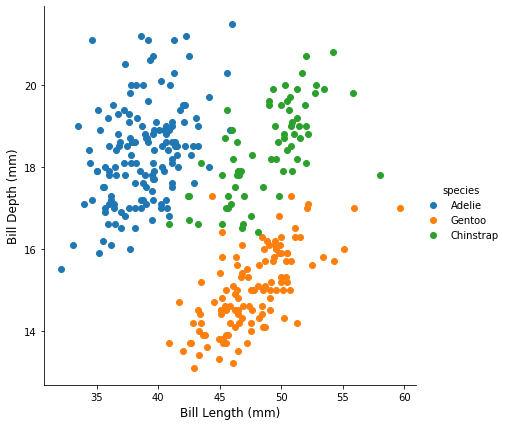

In [ ]:
fig = plt.figure(figsize=(7, 5))
sns_fgrid=sns.FacetGrid(penguin_nonan_df, hue="species", height=6).map(plt.scatter, "bill_length_mm", "bill_depth_mm").add_legend()
plt.xlabel('Bill Length (mm)', fontsize=12)
plt.ylabel('Bill Depth (mm)', fontsize=12)
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Bill_L_D.png', dpi=200)
plt.show()

In [ ]:
#### select only bill_length and and bill_depth as features

penguin_nonan_selected_df = penguin_nonan_df[['species', 'bill_length_mm', 'bill_depth_mm']]
penguin_nonan_selected_df.head(3)

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0


In [ ]:
X=penguin_nonan_selected_df.drop(['species'], axis=1)
Y=penguin_nonan_selected_df['species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30, stratify=Y)

print (X_train.shape, y_train.shape, X_test.shape)

(266, 2) (266,) (67, 2)


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [55]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print (tfp.__version__, tf.__version__)

0.15.0 2.7.0


We need the class prior distribution. 

Simply we count the number of unique classes and divide by the total number of samples to get the class prior distribution. Let's see below -- $$ P(Y=c_k)  = \frac{\sum \limits_i^N \, \delta(Y^{(i)} = y_k)}{N}\, ...... (4.0)$$ 

In [4]:
def get_prior(y):
    """
    This function takes training labels as a numpy array y of shape (num_samples,) as an input. 
    This function will build a Categorical Distribution object with empty batch shape 
    and event shape, with the probability of each class given as above. 
    Your function should return the Distribution object.
    """
    N = y.shape[0] # total number of samples
    unique, counts = np.unique(y, return_counts=True) # count the number of occurences of 0, 1, 2
    probs = counts/N
    print (probs)
    dist = tfd.Categorical(probs=probs)
    return dist

In [ ]:
prior = get_prior(y_train)

print (prior)
print ('check prior probs: ', prior.probs,)

[0.43984962 0.20300752 0.35714286]
tfp.distributions.Categorical("Categorical", batch_shape=[], event_shape=[], dtype=int32)
check prior probs:  tf.Tensor([0.43984962 0.20300752 0.35714286], shape=(3,), dtype=float64)


For class conditionals univariate gaussians will be used as we've described before; $P(X_i | Y=c_k)$ we have 2 features thus $i=0, 1$ and 3 classes thus $k=0, 1, 2$. 

$$
\begin{align}
P(X_i | Y=c_k) &= N(X_i | \mu_{ik}, \sigma_{ik})\\
&= \frac{1}{\sqrt{2\pi\sigma_{ik}^2}} \exp\left\{-\frac{1}{2} \left(\frac{x - \mu_{ik}}{\sigma_{ik}}\right)^2\right\}\, ......(4.1)
\end{align}
$$
with mean $\mu_{ik}$ and standard deviation $\sigma_{ik}$, 12 parameters in all. These parameters will be estimated by maximum likelihood estimation. The parameters can easily be caluclated for a Normal distribution (check [here](https://www.statlect.com/fundamentals-of-statistics/normal-distribution-maximum-likelihood)). 

Mean is of the form $\mu  = \frac{1}{N}\sum \limits_{i=1}^N x_i$, and std can be written as $\sigma^2 = \frac{1}{N} \sum \limits_{i=1}^N (x_j - \mu)^2$. 

In this case including the class info we can modify the expression as below (this can also be derived from the equation above $P(X_i|Y=c_k)$) -- 

$$\mu_{ik} = \frac{\sum_n X_i^{(n)} \delta(Y^{(n)}=c_k)}{\sum_n \delta(Y^{(n)}=c_k)} \, ...... (4.2)\\
\sigma^2_{ik} = \frac{\sum_n (X_i^{(n)} - \mu_{ik})^2 \delta(Y^{(n)}=c_k)}{\sum_n \delta(Y^{(n)}=c_k)}\, ...... (4.3)$$

In [7]:
def class_conditionals_MLE(x, y):
    """
    x shape (samples, features) and  y shape (samples, ) .
    
    The batch shape of this distribution will be 3, it corresponds
    to the number of classes and the event shape corresponds to the number of features.
    This function will then return the Normal Distribution object.
    """
    unique = np.unique(y)
    idxs = [np.where(y==unique[0]), np.where(y==unique[1]), np.where(y==unique[2])]
    mu = []
    sigma2 = []
    for id in idxs:
        mu.append(list(np.mean(x[id], axis=0)) )
    for i, k in enumerate(idxs):
        sigma2.append(list(np.mean((x[k] - mu[i])**2, axis=0)))
    sigma = np.sqrt(sigma2)
    #print('mu and sigma: ', mu, '\n', sigma)
    dist = tfd.MultivariateNormalDiag(loc=mu, scale_diag=sigma)
    return dist, mu, sigma2

In [ ]:
class_conditionals, mu, sigma2 = class_conditionals_MLE(X_train, y_train)

print (class_conditionals)
print ('check mu and variance: ', '\n')

print ('mu: ', mu, )
print ('sigma2: ', sigma2, )
# batch shape : 3 classes, event shape : 2 features 

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float64)
check mu and variance:  

mu:  [ListWrapper([39.017094017093996, 18.389743589743592]), ListWrapper([49.12592592592592, 18.479629629629624]), ListWrapper([48.063157894736854, 15.058947368421052])]
sigma2:  [[7.205861640733441, 1.5171597633136102], [10.038216735253773, 1.1042146776406032], [9.476642659279785, 0.9687357340720222]]


#### What's Happening in Class Conditional Function

the upcoming 2 cells give a breakdown in detail of what's happening in the function above and why it can't be used later for binary classification. 

In [ ]:
unique = np.unique(y_test)
idxs = [np.where(y_test==unique[0]), np.where(y_test==unique[1]), np.where(y_test==unique[2])]

print (unique)
print (idxs, len(idxs), '\n', type(idxs), idxs[0])

for i, k in enumerate(idxs):
  print (i, k)
for id in idxs:
  print (id)  

['Adelie' 'Chinstrap' 'Gentoo']
[(array([ 0,  3,  6,  8, 11, 12, 13, 14, 15, 17, 18, 22, 24, 25, 28, 29, 30,
       31, 38, 40, 42, 46, 49, 50, 51, 54, 57, 63, 64]),), (array([ 4,  5,  7, 10, 23, 26, 27, 32, 34, 39, 44, 53, 56, 58]),), (array([ 1,  2,  9, 16, 19, 20, 21, 33, 35, 36, 37, 41, 43, 45, 47, 48, 52,
       55, 59, 60, 61, 62, 65, 66]),)] 3 
 <class 'list'> (array([ 0,  3,  6,  8, 11, 12, 13, 14, 15, 17, 18, 22, 24, 25, 28, 29, 30,
       31, 38, 40, 42, 46, 49, 50, 51, 54, 57, 63, 64]),)
0 (array([ 0,  3,  6,  8, 11, 12, 13, 14, 15, 17, 18, 22, 24, 25, 28, 29, 30,
       31, 38, 40, 42, 46, 49, 50, 51, 54, 57, 63, 64]),)
1 (array([ 4,  5,  7, 10, 23, 26, 27, 32, 34, 39, 44, 53, 56, 58]),)
2 (array([ 1,  2,  9, 16, 19, 20, 21, 33, 35, 36, 37, 41, 43, 45, 47, 48, 52,
       55, 59, 60, 61, 62, 65, 66]),)
(array([ 0,  3,  6,  8, 11, 12, 13, 14, 15, 17, 18, 22, 24, 25, 28, 29, 30,
       31, 38, 40, 42, 46, 49, 50, 51, 54, 57, 63, 64]),)
(array([ 4,  5,  7, 10, 23, 26, 27, 32, 3

In [ ]:
print (np.mean(X_train[[ 4,  5,  7, 10, 23, 26, 27, 32, 34, 39, 44, 53, 56, 58]],  axis=0))
mu2 = np.mean(X_train[[ 4,  5,  7, 10, 23, 26, 27, 32, 34, 39, 44, 53, 56, 58]],  axis=0)
print (X_train[[ 4,  5,  7, 10, 23, 26, 27, 32, 34, 39, 44, 53, 56, 58]])
print (X_train[4])

print (np.mean((X_train[[ 4,  5,  7, 10, 23, 26, 27, 32, 34, 39, 44, 53, 56, 58]] - mu2)**2, axis=0))

[45.35714286 17.24285714]
[[38.8 20. ]
 [40.3 18.5]
 [46.8 16.1]
 [59.6 17. ]
 [36.9 18.6]
 [58.  17.8]
 [50.7 15. ]
 [50.4 15.7]
 [38.9 18.8]
 [47.5 14. ]
 [45.7 17. ]
 [40.6 17.2]
 [37.3 20.5]
 [43.5 15.2]]
[38.8 20. ]
[49.73244898  3.42102041]


In [ ]:
print (class_conditionals.prob(X_train[1])) 
#calculate the probability density for an example sample. 
# this can also be thought of as likelihood

tf.Tensor([2.28228213e-02 7.27188025e-06 5.03265210e-07], shape=(3,), dtype=float64)


Finally we make the predictions on the test set. 
So we select sample by sample and use the info from prior probabilities and class conditionals. 

$$
P(Y=c_k | \tilde{X}_1,\ldots,\tilde{X}_d) = \frac{P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=c_k)P(Y=c_k)}{\sum_{k=1}^K P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=y_k)P(Y=c_k)}
\, ......\, (4.4)$$

The class prediction can then be taken as the class with the maximum probability:

$$
\hat{Y} = \text{arg}\, \max_{c_k} P\left(Y=c_k | \tilde{X}_1,\ldots,\tilde{X}_d \right) = \text{arg}\, \max_{c_k} \frac{P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=c_k)P(Y=c_k)}{\sum_{k=1}^K P(\tilde{X}_1,\ldots,\tilde{X}_d | Y=y_k)P(Y=c_k)}
\, ......\, (4.5)$$

In [12]:

def predict_class(prior_dist, class_cond_dist, x):
    """
    We will use prior distribution (P(Y|C)), class-conditional distribution(P(X|Y)), 
    and test data-set with shape (batch_shape, 2).
    """
    y = np.zeros((x.shape[0]), dtype=int)
    for i, train_point in enumerate(x):
        likelihood = tf.cast(class_cond_dist.prob(train_point), dtype=tf.float32)
        prior_prob = tf.cast(prior_dist.probs, dtype=tf.float32)
        numerator =  likelihood * prior_prob
        denominator = tf.reduce_sum(numerator)
        P = tf.math.divide(numerator, denominator)
        #print ('check posterior shape: ', P.shape)
        Y = tf.argmax(P) # exact similar to np.argmax [get the class]
        y[i] = int(Y)
    return y

In [ ]:
predictions = predict_class(prior, class_conditionals, X_test)

print (predictions, y_test)

[0 2 2 0 0 2 0 0 0 2 1 0 0 0 0 0 2 0 0 2 2 2 0 1 0 0 1 1 0 0 0 0 1 2 2 2 2
 2 0 1 0 2 0 0 1 2 0 2 2 0 0 0 2 1 0 2 0 0 1 2 2 2 2 0 0 2 2] ['Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo'
 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap' 'Chinstrap' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo']


In [ ]:
class_types = ['Adelie', 'Chinstrap', 'Gentoo']
class_types_dict = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}

labels = dict(zip(class_types_dict.values(), class_types_dict.keys()))

In [ ]:
from sklearn.metrics import accuracy_score


y_test_cat = np.vectorize(class_types_dict.get)(y_test)

print (y_test_cat)
 
accuracy = accuracy_score(y_test_cat, predictions)
print("Test accuracy: ", accuracy)

[0 2 2 0 1 1 0 1 0 2 1 0 0 0 0 0 2 0 0 2 2 2 0 1 0 0 1 1 0 0 0 0 1 2 1 2 2
 2 0 1 0 2 0 2 1 2 0 2 2 0 0 0 2 1 0 2 1 0 1 2 2 2 2 0 0 2 2]
Test accuracy:  0.9104477611940298


In [ ]:
def plot_data(x, y, labels, colors, set='Train'):
    fig = plt.figure(figsize=(8, 6))
    for c in np.unique(y):
        inx = np.where(y == c)
        plt.scatter(x[inx, 0], x[inx, 1], label=labels[c], c=colors[c])
    plt.title("%s set"%(set), fontsize=12)
    plt.xlabel("Bill Length (mm)", fontsize=12)
    plt.ylabel("Bill Depth (mm)", fontsize=12)
    plt.legend()


def get_meshgrid(x0_range, x1_range, num_points=100):
    x0 = np.linspace(x0_range[0], x0_range[1], num_points)
    x1 = np.linspace(x1_range[0], x1_range[1], num_points)
    return np.meshgrid(x0, x1)


def contour_plot(x0_range, x1_range, prob_fn, batch_shape, colours, levels=None, num_points=100):
    X0, X1 = get_meshgrid(x0_range, x1_range, num_points=num_points)
    Z = prob_fn(np.expand_dims(np.array([X0.ravel(), X1.ravel()]).T, 1))
    Z = np.array(Z).T.reshape(batch_shape, *X0.shape)
    for batch in np.arange(batch_shape):
        if levels:
            plt.contourf(X0, X1, Z[batch], alpha=0.2, colors=colours, levels=levels)
        else:
            plt.contour(X0, X1, Z[batch], colors=colours[batch], alpha=0.3)

labels = dict(zip(class_types_dict.values(), class_types_dict.keys()))
colors = ['Blue', 'LimeGreen', 'Pink']            

In [ ]:
# # Plot the model's decision regions

y_train_cat = np.vectorize(class_types_dict.get)(y_train)

plt.figure(figsize=(10, 6))
plot_data(X_test, y_test_cat, labels, colors)
x0_min, x0_max = X_test[:, 0].min(), X_test[:, 0].max()
x1_min, x1_max = X_test[:, 1].min(), X_test[:, 1].max()
contour_plot((x0_min, x0_max), (x1_min, x1_max), 
             lambda x: predict_class(prior, class_conditionals, x), 
             1, colors, levels=[-0.5, 0.5, 1.5, 2.5],
             num_points=400)
plt.title("Test Set Decision Reg.", fontsize=10)
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Decs_Reg_GNB.png', dpi=200)
plt.show()

[0 2 2 0 1 1 0 1 0 2 1 0 0 0 0 0 2 0 0 2 2 2 0 1 0 0 1 1 0 0 0 0 1 2 1 2 2
 2 0 1 0 2 0 2 1 2 0 2 2 0 0 0 2 1 0 2 1 0 1 2 2 2 2 0 0 2 2]
[0 2 2 0 0 2 0 0 0 2 1 0 0 0 0 0 2 0 0 2 2 2 0 1 0 0 1 1 0 0 0 0 1 2 2 2 2
 2 0 1 0 2 0 0 1 2 0 2 2 0 0 0 2 1 0 2 0 0 1 2 2 2 2 0 0 2 2]
Test accuracy:  0.9104477611940298
(10000, 3)
check the fit parameters:  

{'priors': None, 'var_smoothing': 1e-09}
variance: [[ 7.20586167  1.51715979]
 [10.03821677  1.10421471]
 [ 9.47664269  0.96873576]]
mean:  [[39.01709402 18.38974359]
 [49.12592593 18.47962963]
 [48.06315789 15.05894737]]


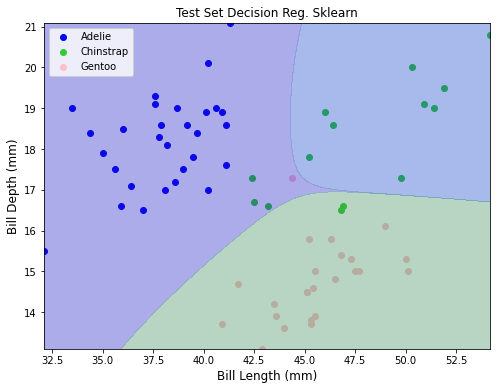

In [ ]:
### try using sklearn 

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

sklearn_GNB = GaussianNB()
sklearn_GNB.fit(X_train, y_train)

predictions_sklearn = sklearn_GNB.predict(X_test)



y_test_cat = np.vectorize(class_types_dict.get)(y_test)
predictions_sklearn_cat = np.vectorize(class_types_dict.get)(predictions_sklearn)

print (y_test_cat)
print (predictions_sklearn_cat)

accuracy_sklearn = accuracy_score(y_test_cat, predictions_sklearn_cat)
print("Test accuracy: ", accuracy_sklearn)

x0_min, x0_max = X_test[:, 0].min(), X_test[:, 0].max()
x1_min, x1_max = X_test[:, 1].min(), X_test[:, 1].max()

xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 100), np.linspace(x1_min, x1_max, 100))

Z = sklearn_GNB.predict_proba(np.c_[xx.ravel(), yy.ravel()])#[:, 0]

#Z_re = Z.reshape(3, *xx.shape)
Z_re = np.array(Z).T.reshape(3, *xx.shape)

print (Z.shape)
#print (Z_re.shape)
colors = ['Blue', 'LimeGreen', 'Pink']
levels=[-0.5, 0.5, 1.5, 2.5]
#for 

plot_data(X_test, y_test_cat, labels, colors)
plt.contourf(xx, yy, Z_re[1], alpha=0.2,  levels=levels)
plt.contourf(xx, yy, Z_re[2], alpha=0.2, colors=colors, levels=levels)
plt.title('Test Set Decision Reg. Sklearn', fontsize=12)
#plt.savefig('/content/drive/My Drive/Colab Notebooks/sklearn_Penguin_GNB.png', dpi=200)
#plt.show()


print ('check the fit parameters: ', '\n')
print (sklearn_GNB.get_params(deep=True))
print ('variance:',  sklearn_GNB.var_)
print ('mean: ', sklearn_GNB.theta_)

#### Connecting Logistic Regression and Naive Bayes

As we discussed before, to connect Naive Bayes and logistic regression, we think of binary classification. Since we have 3 classes here in this Penguin dataset first we transform the problem as one vs rest classifier and then determine the logistic regression parameters.  

Also on the derivation of GNB as a binary classifier, we have used same $\sigma _i$ for two different classes. So here we will be finding 6 parameters; 4 for $\mu _{ik}$ & 2 for $\sigma _i$. 

The class conditional function we wrote before based on equation (20), and (21) depends on $\mu _{ik}$ and since this $\mu_{ik}$ is used in standard deviation formula, we can't use the same function as before because there's no way to get $\mu$ for a feature which is class independent. 

So given the data samples we will learn the standard deviations by minimizing log likelihood given the data and labels. For distribution we will take MultivariateNormalDiag distribution. 

In [ ]:
y_train_cat = np.vectorize(class_types_dict.get)(y_train)
y_train_cat_binary = y_train_cat

y_train_cat_binary[np.where(y_train_cat_binary == 2)] = 1 # gentoo = chinstrap

y_test_cat = np.vectorize(class_types_dict.get)(y_test)
y_test_cat_binary = np.array(y_test_cat)

y_test_cat_binary[np.where(y_test_cat_binary == 2)] = 1 

print ('check shapes: ', y_train_cat_binary.shape, y_test_cat_binary.shape, y_train_cat_binary.dtype, '\n', y_train_cat.shape, y_train_cat)

check shapes:  (266,) (67,) int64 
 (266,) [0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0
 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 1 1 1 0 1]


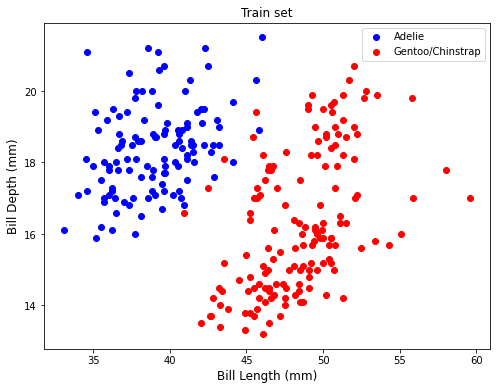

In [ ]:
# Plot the training data

labels_binary = {0: 'Adelie', 1: 'Gentoo/Chinstrap'}
colors_binary = ['blue', 'red',]

plot_data(X_train, y_train_cat_binary, labels_binary, colors_binary)
#plt.savefig('/content/drive/My Drive/Colab Notebooks/sklearn_Penguin_GNB_2class.png', dpi=200)

In [ ]:
#y_train_cat_binary = y_train_cat_binary.astype('float32')
#y_test_cat_binary = y_test_cat_binary.astype('float32')

prior_binary = get_prior(y_train_cat_binary)
print (prior_binary.probs, print (type(prior_binary)))

[0.43984962 0.56015038]
<class 'tensorflow_probability.python.distributions.categorical.Categorical'>
tf.Tensor([0.43984962 0.56015038], shape=(2,), dtype=float64) None


In [53]:
def learn_stdevs(x, y, scales, optimiser, epochs):
    """
    Input: data points, targets, standard dev. variable, optimiser (Adam) and epochs.
    Trainable variables will be the standard dev. (scales) in a custom training loop.
    For log likelihood we will use MultivariateNormalDiag distribution object, this will be learned over epochs.
    """
    def compute_mu(x_train, y_train): # this is exactly same as used before in class conditionals
        mu = []
        for value in np.unique(y):
            idx = np.where(y==value)
            mu.append(list(np.mean(x[idx], axis=0)) )
        return np.array(mu).astype(np.float32)

    @tf.function # converts the regular def to a tensorflow graph function
    def nll(x_train, y_train):#this can later be used under GradientTape
        log_probs = dist.log_prob(x_train)
        y_train = tf.one_hot(y_train, len(tf.unique(y_train))) # turn to categorical distribution
        return -tf.reduce_mean(log_probs * y_train) # distrbution log prob * y_train

    def compute_loss_grads(x_train, y_train, dist):
        with tf.GradientTape() as g: # performs the differentiation for backpropagation
            g.watch(dist.trainable_variables)  
            loss = nll(x_train, y_train)
            grads = g.gradient(loss, dist.trainable_variables) 
        return loss, grads

    nlls, scales_arr = [], []
    print('x shape before: ', x.shape)
    mu = compute_mu(x, y)
    print('loc shape: ', mu.shape)
    x = np.expand_dims(x, axis=1).astype(np.float32)
    print('x shape after: ', x.shape)
    dist = tfd.MultivariateNormalDiag(loc=mu, scale_diag=scales) # define the multivariate normal dist., with scales as trainable params. 
    for epoch in range(epochs):
        loss, grads = compute_loss_grads(x, y, dist)
        optimiser.apply_gradients(zip(grads, dist.trainable_variables))
        if epoch%20==0:
          print("Epoch \t Loss: ", epoch, loss)
        nlls.append(loss)
        scales_arr.append(scales.numpy()) # transforms the input tensor to numpy array via scales.numpy()
    nlls, scales_arr = np.array(nlls), np.array(scales_arr)
    return nlls, scales_arr, dist

In [ ]:
scales = tf.Variable([5., 5.]) # this is trainable params. 
print (scales)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
epochs = 600

In [ ]:
nlls, scales_arr, class_conditionals_binary = learn_stdevs(X_train, y_train_cat_binary, scales, opt, 
                                                           epochs)

Epoch 	 Loss:  0 tf.Tensor(2.6432767, shape=(), dtype=float32)
Epoch 	 Loss:  20 tf.Tensor(2.612201, shape=(), dtype=float32)
Epoch 	 Loss:  40 tf.Tensor(2.5805533, shape=(), dtype=float32)
Epoch 	 Loss:  60 tf.Tensor(2.5483735, shape=(), dtype=float32)
Epoch 	 Loss:  80 tf.Tensor(2.5157988, shape=(), dtype=float32)
Epoch 	 Loss:  100 tf.Tensor(2.4830365, shape=(), dtype=float32)
Epoch 	 Loss:  120 tf.Tensor(2.450353, shape=(), dtype=float32)
Epoch 	 Loss:  140 tf.Tensor(2.4180593, shape=(), dtype=float32)
Epoch 	 Loss:  160 tf.Tensor(2.3864856, shape=(), dtype=float32)
Epoch 	 Loss:  180 tf.Tensor(2.355945, shape=(), dtype=float32)
Epoch 	 Loss:  200 tf.Tensor(2.3267198, shape=(), dtype=float32)
Epoch 	 Loss:  220 tf.Tensor(2.299125, shape=(), dtype=float32)
Epoch 	 Loss:  240 tf.Tensor(2.2736912, shape=(), dtype=float32)
Epoch 	 Loss:  260 tf.Tensor(2.2514012, shape=(), dtype=float32)
Epoch 	 Loss:  280 tf.Tensor(2.2337108, shape=(), dtype=float32)
Epoch 	 Loss:  300 tf.Tensor(2.2219

In [ ]:
print (class_conditionals_binary.parameters)

{'loc': array([[39.017094, 18.389744],
       [48.448322, 16.298658]], dtype=float32), 'scale_diag': <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([2.9560146, 1.6589097], dtype=float32)>, 'scale_identity_multiplier': None, 'validate_args': False, 'allow_nan_stats': True, 'experimental_use_kahan_sum': False, 'name': 'MultivariateNormalDiag'}


In [ ]:
print("Class conditional means:")
print(class_conditionals_binary.loc.numpy())
print("\nClass conditional standard deviations:")
print(class_conditionals_binary.stddev().numpy())

Class conditional means:
[[39.017094 18.389744]
 [48.448322 16.298658]]

Class conditional standard deviations:
[[2.9560146 1.6589097]
 [2.9560146 1.6589097]]


In [ ]:
print (class_conditionals_binary.covariance().numpy())
cov_mat = class_conditionals_binary.covariance().numpy()
print (cov_mat[0], '\n', cov_mat[1])

[[[8.738023  0.       ]
  [0.        2.7519813]]

 [[8.738023  0.       ]
  [0.        2.7519813]]]
[[8.738023  0.       ]
 [0.        2.7519813]] 
 [[8.738023  0.       ]
 [0.        2.7519813]]


Here we see that there are only 2 different numbers for standard deviations. That's what we expected...

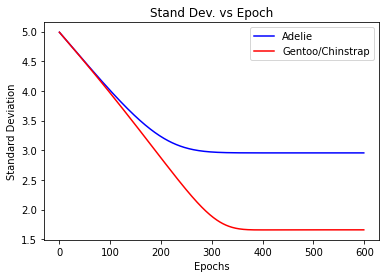

In [ ]:
fig = plt.figure(figsize=(6, 4))
for k in [0, 1]:
    plt.plot(scales_arr[:, k], color=colors_binary[k], label=labels_binary[k])
plt.title("Stand Dev. vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

<Figure size 720x432 with 0 Axes>

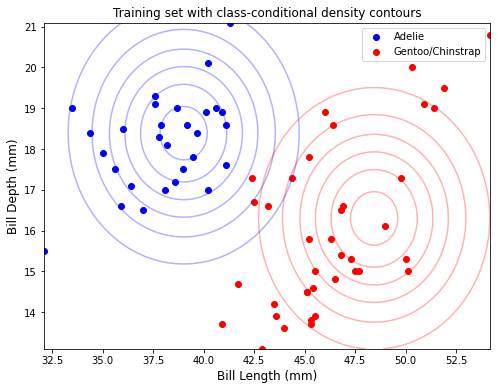

In [ ]:
plt.figure(figsize=(10, 6))
plot_data(X_test, y_test_cat_binary, labels_binary, colors_binary)
x0_min, x0_max = X_test[:, 0].min(), X_test[:, 0].max()
x1_min, x1_max = X_test[:, 1].min(), X_test[:, 1].max()
contour_plot((x0_min, x0_max), (x1_min, x1_max), class_conditionals_binary.prob, 2, colors_binary)
plt.title("Training set with class-conditional density contours")
plt.show()

<Figure size 720x432 with 0 Axes>

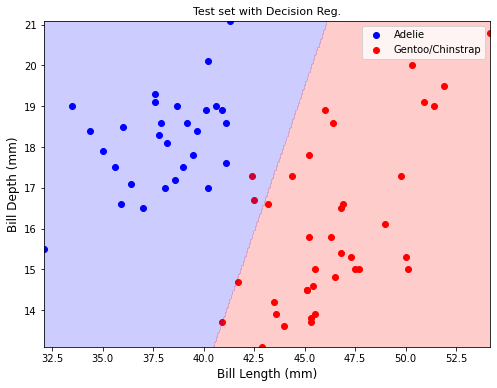

In [ ]:
# # Plot the model's decision regions

plt.figure(figsize=(10, 6))
plot_data(X_test, y_test_cat_binary, labels_binary, colors_binary)
x0_min, x0_max = X_test[:, 0].min(), X_test[:, 0].max()
x1_min, x1_max = X_test[:, 1].min(), X_test[:, 1].max()
contour_plot((x0_min, x0_max), (x1_min, x1_max), 
             lambda x: predict_class(prior_binary, class_conditionals_binary, x), 
             1, colors_binary, levels=[-0.5, 0.5, 1.5],
             num_points=300)
plt.title("Test set with Decision Reg.", fontsize=11)
plt.savefig('/content/drive/My Drive/Colab Notebooks/sklearn_Penguin_GNB_2class_Decs_Reg.png')
plt.show()

#### Deriving Parameters for Logistic Regression 
**Using Binary Gaussian Naive Bayes Classifier** 

We have already derived the parameters before, here we rewrite them in  more compact manner. 

$$w_0 = \text{ln}\, \frac{1-\pi}{\pi} + \sum_i \frac{\mu_{i1}^2 - \mu_{i0}^2}{2\sigma_i^2}; \, w_i = \frac{\mu_{i0} - \mu_{i1}}{2\sigma_i^2}\, ......\, (5.1)$$

For Multivariate Normal distribution we usually express it in terms of mean vector $\mu$, and covariance matrix $\Sigma$.  

$$w_0 = \text{log}\, \frac{P(Y=Y_0)}{P(Y=Y_1)} + \frac{1}{2}\mu_1^T\, \Sigma^{-1}\, \mu_1 - \frac{1}{2}\mu_0^T\, \Sigma^{-1}\, \mu_0 ; \, w = \frac{\mu_{0} - \mu_{1}}{\Sigma}\, ......\, (5.2)$$

In [58]:

def get_logistic_regression_params(prior, class_conditionals):
    """
    We will use the prior distribution and class-conditional distribution as inputs.
    then using the formulas above we will calculate the weight and bias term, 
    function returns a 2-tuple of numpy arrays of shapes (2,) and () respectively.
    """
    cov = class_conditionals.covariance().numpy() #Sigma
    cov = cov[1] # covariance matrix is of shape [2, 2, 2], so we choose one of the entries in first dim. as cov[0]==cov[1]
    cov_inv = np.linalg.inv(cov) #Sigma inverse
    print('covariance matrix: ', cov)
    #print(cov_inv, end='\n\n')
    
    mu = class_conditionals.loc.numpy()
    print('mean vector: ', mu, end='\n\n')
    
    log_p = np.log(prior.prob(0) / prior.prob(1))
    print('ratio of priors: ', log_p, end='\n\n')
    
    weight = cov_inv @ (mu[0] - mu[1])
    print('weight: ', weight, end='\n\n')
    
    bias = -0.5 * (mu[0].T @ cov_inv @ mu[0]) + 0.5 * (mu[1].T @ cov_inv @ mu[1]) + log_p
    print('bias: ', bias)
    
    return weight, bias

In [77]:
weight, bias = get_logistic_regression_params(prior_binary, class_conditionals_binary)

covariance matrix:  [[0.3208845  0.        ]
 [0.         0.10949251]]
mean vector:  [[5.0324326 3.445946 ]
 [6.2445784 2.851807 ]]

ratio of priors:  -0.8079226951523734

weight:  [-3.7775145  5.426297 ]

bias:  3.4048687477187203


[0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1]
[0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1]
Test accuracy Log Reg:  0.9850746268656716
(10000, 2)


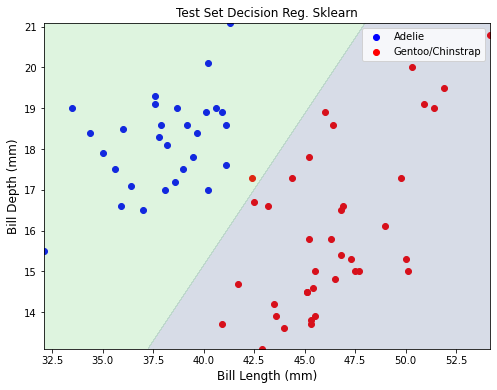

check the fit parameters:  

{'C': 1, 'class_weight': 'none', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
weights: [[ 1.26050116 -1.69563618]]
bias:  [-24.74252326]


In [ ]:
### use sklearn logistic reg. 

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

sklearn_LogReg = LogisticRegression(penalty='l2', class_weight='none', max_iter=50, solver='lbfgs', C=1, intercept_scaling=1) # multi_class: ovr for binary problem
#sklearn_LogReg = SGDClassifier(loss='log', max_iter=2000, tol=1e-5, class_weight={1:0.43984962, 0:0.56015038})

sklearn_LogReg.fit(X_train, y_train_cat_binary)

predictions_sklearn = sklearn_LogReg.predict(X_test)



#y_test_cat = np.vectorize(class_types_dict.get)(y_test)
class_types_dict_binary = {'Adelie':0, 'Chinstrap/Gentoo':1}

#predictions_sklearn_cat_binary = np.vectorize(class_types_dict_binary.get)(predictions_sklearn)

print (y_test_cat_binary)
print (predictions_sklearn)

accuracy_sklearn = accuracy_score(y_test_cat_binary, predictions_sklearn)
print("Test accuracy Log Reg: ", accuracy_sklearn)

x0_min, x0_max = X_test[:, 0].min(), X_test[:, 0].max()
x1_min, x1_max = X_test[:, 1].min(), X_test[:, 1].max()

xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 100), np.linspace(x1_min, x1_max, 100))

Z = sklearn_LogReg.predict_proba(np.c_[xx.ravel(), yy.ravel()])#[:, 0]

#Z_re = Z.reshape(3, *xx.shape)
Z_re = np.array(Z).T.reshape(2, *xx.shape) # 2 features

print (Z.shape)
#print (Z_re.shape)
colors = ['Blue', 'LimeGreen', 'Pink']
levels=[-0.5, 0.5, 1.5]
#for 

plot_data(X_test, y_test_cat_binary, labels_binary, colors_binary)
plt.contourf(xx, yy, Z_re[0], alpha=0.2,  levels=levels)
#plt.contourf(xx, yy, Z_re[2], alpha=0.2, colors=colors, levels=levels)
plt.title('Test Set Decision Reg. Sklearn', fontsize=12)
plt.show()


print ('check the fit parameters: ', '\n')
print (sklearn_LogReg.get_params(deep=True))
print ('weights:',  sklearn_LogReg.coef_)
print ('bias: ', sklearn_LogReg.intercept_)

### Check with Iris Dataset

In [3]:
from sklearn import datasets, model_selection
iris = datasets.load_iris()
data = iris.data[:, :2]
targets = iris.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(data, targets, test_size=0.2)

print ('train feature shape: ', x_train.shape, x_train[0], x_train[10])
print ('train label shape: ', y_train.shape, y_train[0], y_train[10])

train feature shape:  (120, 2) [6.7 2.5] [6.7 3. ]
train label shape:  (120,) 2 2


In [18]:
prior = get_prior(y_train)

print (prior)
print (prior.probs)

class_conditionals, mu, sigma2 = class_conditionals_MLE(x_train, y_train)
print ('\n')
print ('mu: ', mu, )
print ('sigma2: ', sigma2)
# batch shape : 3 classes, event shape : 2 features 


print (class_conditionals)

[0.30833333 0.34166667 0.35      ]
tfp.distributions.Categorical("Categorical", batch_shape=[], event_shape=[], dtype=int32)
tf.Tensor([0.30833333 0.34166667 0.35      ], shape=(3,), dtype=float64)


mu:  [ListWrapper([5.032432432432434, 3.4459459459459465]), ListWrapper([5.936585365853658, 2.760975609756098]), ListWrapper([6.545238095238096, 2.9404761904761902])]
sigma2:  [[0.13462381300219142, 0.1235646457268079], [0.26475907198096366, 0.10433075550267697], [0.35676303854875296, 0.08621882086167802]]
tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float64)


In [13]:
# Get the class predictions

predictions = predict_class(prior, class_conditionals, x_test)

print (predictions)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Test accuracy: {:.4f}".format(accuracy))

[0 1 0 0 1 1 0 2 2 0 2 1 1 2 0 1 1 0 2 0 0 1 2 0 2 1 0 2 1 0]
Test accuracy: 0.8333


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

sklearn_GNB = GaussianNB()
sklearn_GNB.fit(x_train, y_train)

predictions_sklearn = sklearn_GNB.predict(x_test)



#y_test_cat = np.vectorize(class_types_dict.get)(y_test)
#predictions_sklearn_cat = np.vectorize(class_types_dict.get)(predictions_sklearn)

#print (y_test_cat)
print (predictions_sklearn)

accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
print("Test accuracy sklearn: ", accuracy_sklearn)

[0 1 0 0 1 1 0 2 2 0 2 1 1 2 0 1 1 0 2 0 0 1 2 0 2 1 0 2 1 0]
Test accuracy sklearn:  0.8333333333333334


In [17]:
print ('check the fit parameters: ', '\n')
print (sklearn_GNB.get_params(deep=True))
print ('variance:',  sklearn_GNB.var_)
print ('mean: ', sklearn_GNB.theta_)

check the fit parameters:  

{'priors': None, 'var_smoothing': 1e-09}
variance: [[0.13462381 0.12356465]
 [0.26475907 0.10433076]
 [0.35676304 0.08621882]]
mean:  [[5.03243243 3.44594595]
 [5.93658537 2.76097561]
 [6.5452381  2.94047619]]


In [19]:
y_train_binary = np.array(y_train)
y_train_binary[np.where(y_train_binary == 2)] = 1

y_test_binary = np.array(y_test)
y_test_binary[np.where(y_test_binary == 2)] = 1

print ('check shapes: ', y_train_binary.shape, y_test_binary.shape)
print ('y test binary: ', y_test_binary)

check shapes:  (120,) (30,)
y test binary:  [0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0]


In [20]:
prior_binary = get_prior(y_train_binary)
print (prior_binary.probs)

[0.30833333 0.69166667]
tf.Tensor([0.30833333 0.69166667], shape=(2,), dtype=float64)


In [74]:
scales = tf.Variable([1., 1.] )
print (scales)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
epochs = 300

nlls, scales_arr, class_conditionals_binary = learn_stdevs(x_train, y_train_binary, scales, opt, epochs)

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>
x shape before:  (120, 2)
loc shape:  (2, 2)
x shape after:  (120, 1, 2)
Epoch 	 Loss:  0 tf.Tensor(1.0265328, shape=(), dtype=float32)
Epoch 	 Loss:  20 tf.Tensor(0.86319447, shape=(), dtype=float32)
Epoch 	 Loss:  40 tf.Tensor(0.702211, shape=(), dtype=float32)
Epoch 	 Loss:  60 tf.Tensor(0.591175, shape=(), dtype=float32)
Epoch 	 Loss:  80 tf.Tensor(0.58370197, shape=(), dtype=float32)
Epoch 	 Loss:  100 tf.Tensor(0.58212346, shape=(), dtype=float32)
Epoch 	 Loss:  120 tf.Tensor(0.5818395, shape=(), dtype=float32)
Epoch 	 Loss:  140 tf.Tensor(0.58180135, shape=(), dtype=float32)
Epoch 	 Loss:  160 tf.Tensor(0.5817963, shape=(), dtype=float32)
Epoch 	 Loss:  180 tf.Tensor(0.5817957, shape=(), dtype=float32)
Epoch 	 Loss:  200 tf.Tensor(0.5817955, shape=(), dtype=float32)
Epoch 	 Loss:  220 tf.Tensor(0.5817956, shape=(), dtype=float32)
Epoch 	 Loss:  240 tf.Tensor(0.58179563, shape=(), dtype=floa

In [82]:
# View the distribution parameters

print("Class conditional means:")
print(class_conditionals_binary.loc.numpy())
print("\nClass conditional standard deviations:")
print(class_conditionals_binary.stddev().numpy())
print(np.shape(class_conditionals_binary.stddev().numpy()))

print(class_conditionals_binary.covariance().numpy())
print('square of stddev: ', np.square(class_conditionals_binary.stddev().numpy()))
print('\n')
print(np.shape(class_conditionals_binary.covariance().numpy()))
print(class_conditionals_binary.parameters)

Class conditional means:
[[5.0324326 3.445946 ]
 [6.2445784 2.851807 ]]

Class conditional standard deviations:
[[0.5664667  0.33089653]
 [0.5664667  0.33089653]]
(2, 2)
[[[0.3208845  0.        ]
  [0.         0.10949251]]

 [[0.3208845  0.        ]
  [0.         0.10949251]]]
square of stddev:  [[0.3208845  0.10949251]
 [0.3208845  0.10949251]]


(2, 2, 2)
{'loc': array([[5.0324326, 3.445946 ],
       [6.2445784, 2.851807 ]], dtype=float32), 'scale_diag': <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0.5664667 , 0.33089653], dtype=float32)>, 'scale_identity_multiplier': None, 'validate_args': False, 'allow_nan_stats': True, 'experimental_use_kahan_sum': False, 'name': 'MultivariateNormalDiag'}


In [94]:
w, w0 = get_logistic_regression_params(prior_binary, class_conditionals_binary)
print ('weight and bias: ', w, w0)

covariance matrix:  [[0.3208845  0.        ]
 [0.         0.10949251]]
mean vector:  [[5.0324326 3.445946 ]
 [6.2445784 2.851807 ]]

ratio of priors:  -0.8079226951523734

weight:  [-3.7775145  5.426297 ]

bias:  3.4048687477187203
weight and bias:  [-3.7775145  5.426297 ] 3.4048687477187203


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

sklearn_LogReg = LogisticRegression(class_weight='balanced', max_iter=5000, solver='sag', C=1, intercept_scaling=1) # multi_class: ovr for binary problem
#sklearn_LogReg = SGDClassifier(loss='log', max_iter=2000, tol=1e-5, class_weight={1:0.43984962, 0:0.56015038})

sklearn_LogReg.fit(x_train, y_train_binary)

predictions_sklearn = sklearn_LogReg.predict(x_test)

print ('check the fit parameters: ', '\n')
print (sklearn_LogReg.get_params(deep=True))
print ('weights:',  sklearn_LogReg.coef_)
print ('bias: ', sklearn_LogReg.intercept_)

check the fit parameters:  

{'C': 1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
weights: [[ 3.03190154 -3.19091129]]
bias:  [-6.75190939]


### Define a Custom Logistic Regression Classifier

In [111]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z))
def loss(y, y_hat):
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
  return loss

def gradients(X, y, y_hat):
  
  # X --> Input.
  # y --> true/target value.
  # y_hat --> hypothesis/predictions.
  # w --> weights (parameter).
  # b --> bias (parameter).
  
  # m-> number of training examples.
  m = X.shape[0]
  
  # Gradient of loss w.r.t weights.
  dw = (1/m)*np.dot(X.T, (y_hat - y))
  
  # Gradient of loss w.r.t bias.
  db = (1/m)*np.sum((y_hat - y)) 
  
  return dw, db


def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = X
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = X
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)        

w, b, l = train(x_train, y_train_binary, bs=1, epochs=2000, lr=5e-3)
print (w, b)    

[[  6.54484322]
 [-10.61926577]] -1.9100633863956042


# !!!!!! End !!!!!!